In [2]:
# подключаем необходимые библиотеки
import numpy as np
import sys
from matplotlib import pyplot as plt

In [3]:
# создаем класс
class PartyNN(object):
    def __init__(self, learning_rate=0.1):
        # случайные исходные веса от 0 к 1 уровню и от 1 к выходному
        self.weights_0_1 = np.random.normal(0.0, 2 ** -0.5,(2, 3))
        self.weights_1_2 = np.random.normal(0.0, 1, (1, 2))
        # применение сигмоидной функции
        self.sigmoid_mapper = np.vectorize(self.sigmoid)
        self.learning_rate = np.array([learning_rate])
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    # метод обучения и проход через сигмоиды
    def predict(self, inputs):
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        outputs_2 = self.sigmoid_mapper(inputs_2)
        return outputs_2
    # реализация метода обучения обратного распространения
    def train(self, inputs, expected_predict):
        inputs_1 = np.dot(self.weights_0_1, inputs)
        outputs_1 = self.sigmoid_mapper(inputs_1)
        inputs_2 = np.dot(self.weights_1_2, outputs_1)
        outputs_2 = self.sigmoid_mapper(inputs_2)
        actual_predict = outputs_2[0]
        
        error_layer_2 = np.array([actual_predict - expected_predict])
        gradient_layer_2 = actual_predict * (1 - actual_predict)
        weights_delta_layer_2 = error_layer_2 * gradient_layer_2
        
        self.weights_1_2 -= (np.dot(weights_delta_layer_2, outputs_1.reshape(1, len(outputs_1)))) * self.learning_rate
        
        error_layer_1 = weights_delta_layer_2 * self.weights_1_2
        gradient_layer_1 = outputs_1 * (1 - outputs_1)
        weights_delta_layer_1 = error_layer_1 * gradient_layer_1
        
        self.weights_0_1 -= np.dot(inputs.reshape(len(inputs), 1), weights_delta_layer_1).T * self.learning_rate

In [4]:
# метод оценки качества через среднеквадратичное отклонение
def MSE(y, Y):
    return np.mean((y-Y)**2)

In [44]:
# описание случаев для обучения
train = [
([0, 0, 0], 1),
([0, 0, 1], 1),
([0, 1, 0], 0),
([0, 1, 1], 0),
([1, 0, 0], 1),
([1, 0, 1], 1),
([1, 1, 0], 0),
([1, 1, 1], 0),]
# количество эпох обучения
epochs_list = [500,750,1000,1250,1500,1750,2000,2250,2500]
loss_list = []
predict_list = []
epochs = 2500
# скорость обучения
learning_rate = 0.02
# создаем сеть и тренируем сеть
print('Обечение моделей с разницей эпох')
network = PartyNN(learning_rate=learning_rate)
for i in range(0,len(epochs_list)):
    epochs = epochs_list[i]
    for e in range(epochs):
        inputs_ = []
        counter = 0
        correct_predictions = []
        for input_stat, correct_predict in train:
            network.train(np.array(input_stat), correct_predict)
            inputs_.append(np.array(input_stat))
            correct_predictions.append(np.array(correct_predict))
            # # выполняем предсказание сети
            # print("For input: {} the prediction is: {}, expected:{}".format(str(input_stat),str(network.predict(np.array(input_stat)) > 0.5),str(correct_predict == 1)))
            if network.predict(np.array(input_stat)) > 0.5 and correct_predict == 1:
                counter = counter+1
            if network.predict(np.array(input_stat)) <= 0.5 and correct_predict == 0:
                counter = counter+1
            # # посмотрим количественные значения предсказывания сети
            # print("For input: {} the prediction is: {}, expected:{}".format(str(input_stat),str(network.predict(np.array(input_stat))),str(correct_predict == 1)))
        # print('\n')
    predict_list.append(counter) 
            
    train_loss = MSE(network.predict(np.array(inputs_).T),np.array(correct_predictions))
    loss_list.append(train_loss)
    sys.stdout.write("\rКоличество эпох: {}, Progress: {}, Training loss:{}\n".format(epochs_list[i], str(100 * e/float(epochs))[:4],str(train_loss)[:5]))
    # выполняем предсказание сети
    counter = 0    
print('Количество верных ответов')
print(predict_list)
print('Качество ответа')
print(loss_list)

Обечение моделей с разницей эпох
Количество эпох: 500, Progress: 99.8, Training loss:0.247
Количество эпох: 750, Progress: 99.8, Training loss:0.207
Количество эпох: 1000, Progress: 99.9, Training loss:0.079
Количество эпох: 1250, Progress: 99.9, Training loss:0.024
Количество эпох: 1500, Progress: 99.9, Training loss:0.012
Количество эпох: 1750, Progress: 99.9, Training loss:0.007
Количество эпох: 2000, Progress: 99.9, Training loss:0.005
Количество эпох: 2250, Progress: 99.9, Training loss:0.003
Количество эпох: 2500, Progress: 99.9, Training loss:0.003
Веса ребер первого уровня
[[-0.94112403  4.40792588 -0.90346986]
 [ 0.39085981 -3.74424127  0.40581696]]
Веса ребер второго уровня
[[-3.40607362  7.46812514]]
Количество верных ответов
[4, 5, 8, 8, 8, 8, 8, 8, 8]
Качество ответа
[0.24723231255174902, 0.20707274142476773, 0.07904559824987832, 0.024308638902334007, 0.01218865674103541, 0.007584797066334225, 0.0052671907748966535, 0.003907666172942486, 0.0030307441344349048]


Text(0.5, 1.0, 'График зависимости значения лоса от эпох')

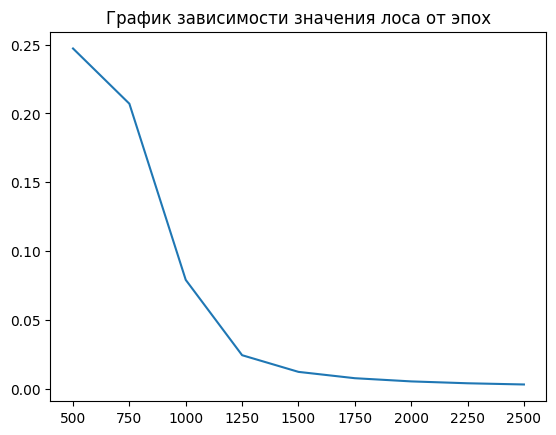

In [47]:
plt.plot( epochs_list, loss_list,linestyle = "solid")
plt.title("График зависимости значения лоса от эпох")

In [24]:
# выполняем предсказание сети
predict_list = []
counter = 0
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected:{}".format(str(input_stat),str(network.predict(np.array(input_stat)) > 0.5),str(correct_predict == 1)))
    if network.predict(np.array(input_stat)) > 0.5 and correct_predict == 1:
        counter = counter+1
    if network.predict(np.array(input_stat)) <= 0.5 and correct_predict == 0:
        counter = counter+1
predict_list.append(counter)     
print('Ответ в цифрах')
# посмотрим количественные значения предсказывания сети
for input_stat, correct_predict in train:
    print("For input: {} the prediction is: {}, expected:{}".format(str(input_stat),str(network.predict(np.array(input_stat))),str(correct_predict == 1)))
# посмотрим количественные весов между слоем 0 и 1
print('Веса ребер первого уровня')
print(network.weights_0_1)
print('Веса ребер второго уровня')
# посмотрим количественные весов между слоем 1 и 2
print(network.weights_1_2)
print('Количество верных ответов')
print(predict_list)

For input: [0, 0, 0] the prediction is: [ True], expected:True
For input: [0, 0, 1] the prediction is: [ True], expected:True
For input: [0, 1, 0] the prediction is: [False], expected:False
For input: [0, 1, 1] the prediction is: [False], expected:False
For input: [1, 0, 0] the prediction is: [ True], expected:True
For input: [1, 0, 1] the prediction is: [ True], expected:True
For input: [1, 1, 0] the prediction is: [False], expected:False
For input: [1, 1, 1] the prediction is: [False], expected:False
Ответ в цифрах
For input: [0, 0, 0] the prediction is: [0.89160097], expected:True
For input: [0, 0, 1] the prediction is: [0.97282042], expected:True
For input: [0, 1, 0] the prediction is: [0.03916669], expected:False
For input: [0, 1, 1] the prediction is: [0.04467759], expected:False
For input: [1, 0, 0] the prediction is: [0.97295983], expected:True
For input: [1, 0, 1] the prediction is: [0.99185133], expected:True
For input: [1, 1, 0] the prediction is: [0.04385054], expected:Fals

Text(0.5, 1.0, 'График количества верных ответов от эпох')

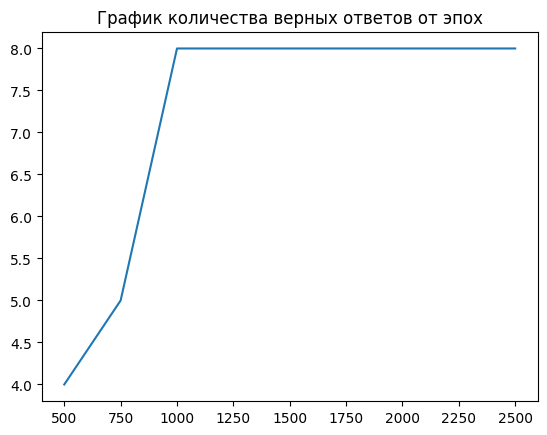

In [46]:
plt.plot( epochs_list, predict_list,linestyle = "solid")
plt.title("График количества верных ответов от эпох")